In [2]:
from Poisson import PoissonModel
from allocation import allocator
from hist_retrieval import hist_retriever
from allocation import allocator
from clustering import clusterer
from itertools import chain
import cPickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Create a Dataframe and drop extra column
df = pd.read_csv('../data/seattle_911_prepped_no_out.csv', low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
# Load pickled Poisson model
pkl_object = open('PoissonModel.pkl')
model = pickle.load(pkl_object)   

In [4]:
query = {'date_input': '2016-11-20', 'num_units': 23, 
         'home_game': 'mariners', 'time_range': 0}

In [5]:
preds = model.predict(query)
preds

[('zone1', 19.879161626918705),
 ('zone2', 15.926433896358214),
 ('zone3', 10.645520356589104),
 ('zone4', 18.824449463208914),
 ('zone5', 25.070817033470174),
 ('zone6', 12.996972082692562),
 ('zone7', 18.078276651701092)]

In [6]:
alloc = allocator(query["num_units"], preds)
alloc

{'zone1': 3.0,
 'zone2': 3.0,
 'zone3': 4.0,
 'zone4': 3.0,
 'zone5': 4.0,
 'zone6': 3.0,
 'zone7': 3.0}

In [7]:
# Homegames
mariners, seahawks, sounders = 0,0,0
if query['home_game'] == 'mariners':
    mariners = 1
if query['home_game'] == 'seahawks':
    seahawks = 1
if query['home_game'] == 'sounders':
    sounders = 1

    
df1 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone1')
df2 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone2')
df3 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone3')
df4 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone4')
df5 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone5')
df6 = hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone6')
df7 =  hist_retriever(df, mariners, seahawks, sounders, query['date_input'], 
                         query['time_range'], 'zone7')

In [8]:
# Find centroids with clusterer
centroids1, clusters1 = clusterer(df1, int(alloc['zone1']))
centroids2, clusters2 = clusterer(df2, int(alloc['zone2']))
centroids3, clusters3 = clusterer(df3, int(alloc['zone3']))
centroids4, clusters4 = clusterer(df4, int(alloc['zone4']))
centroids5, clusters5 = clusterer(df5, int(alloc['zone5']))
centroids6, clusters6 = clusterer(df6, int(alloc['zone6']))
centroids7, clusters7 = clusterer(df7, int(alloc['zone7']))

In [9]:
# Combine centroids and create DataFrame of locations
centroids = list(chain(centroids1, centroids2, centroids3, centroids4,
                       centroids5, centroids6, centroids7))
centroid_df = pd.DataFrame(centroids)
centroid_df.columns = ['Latitude', 'Longitude']

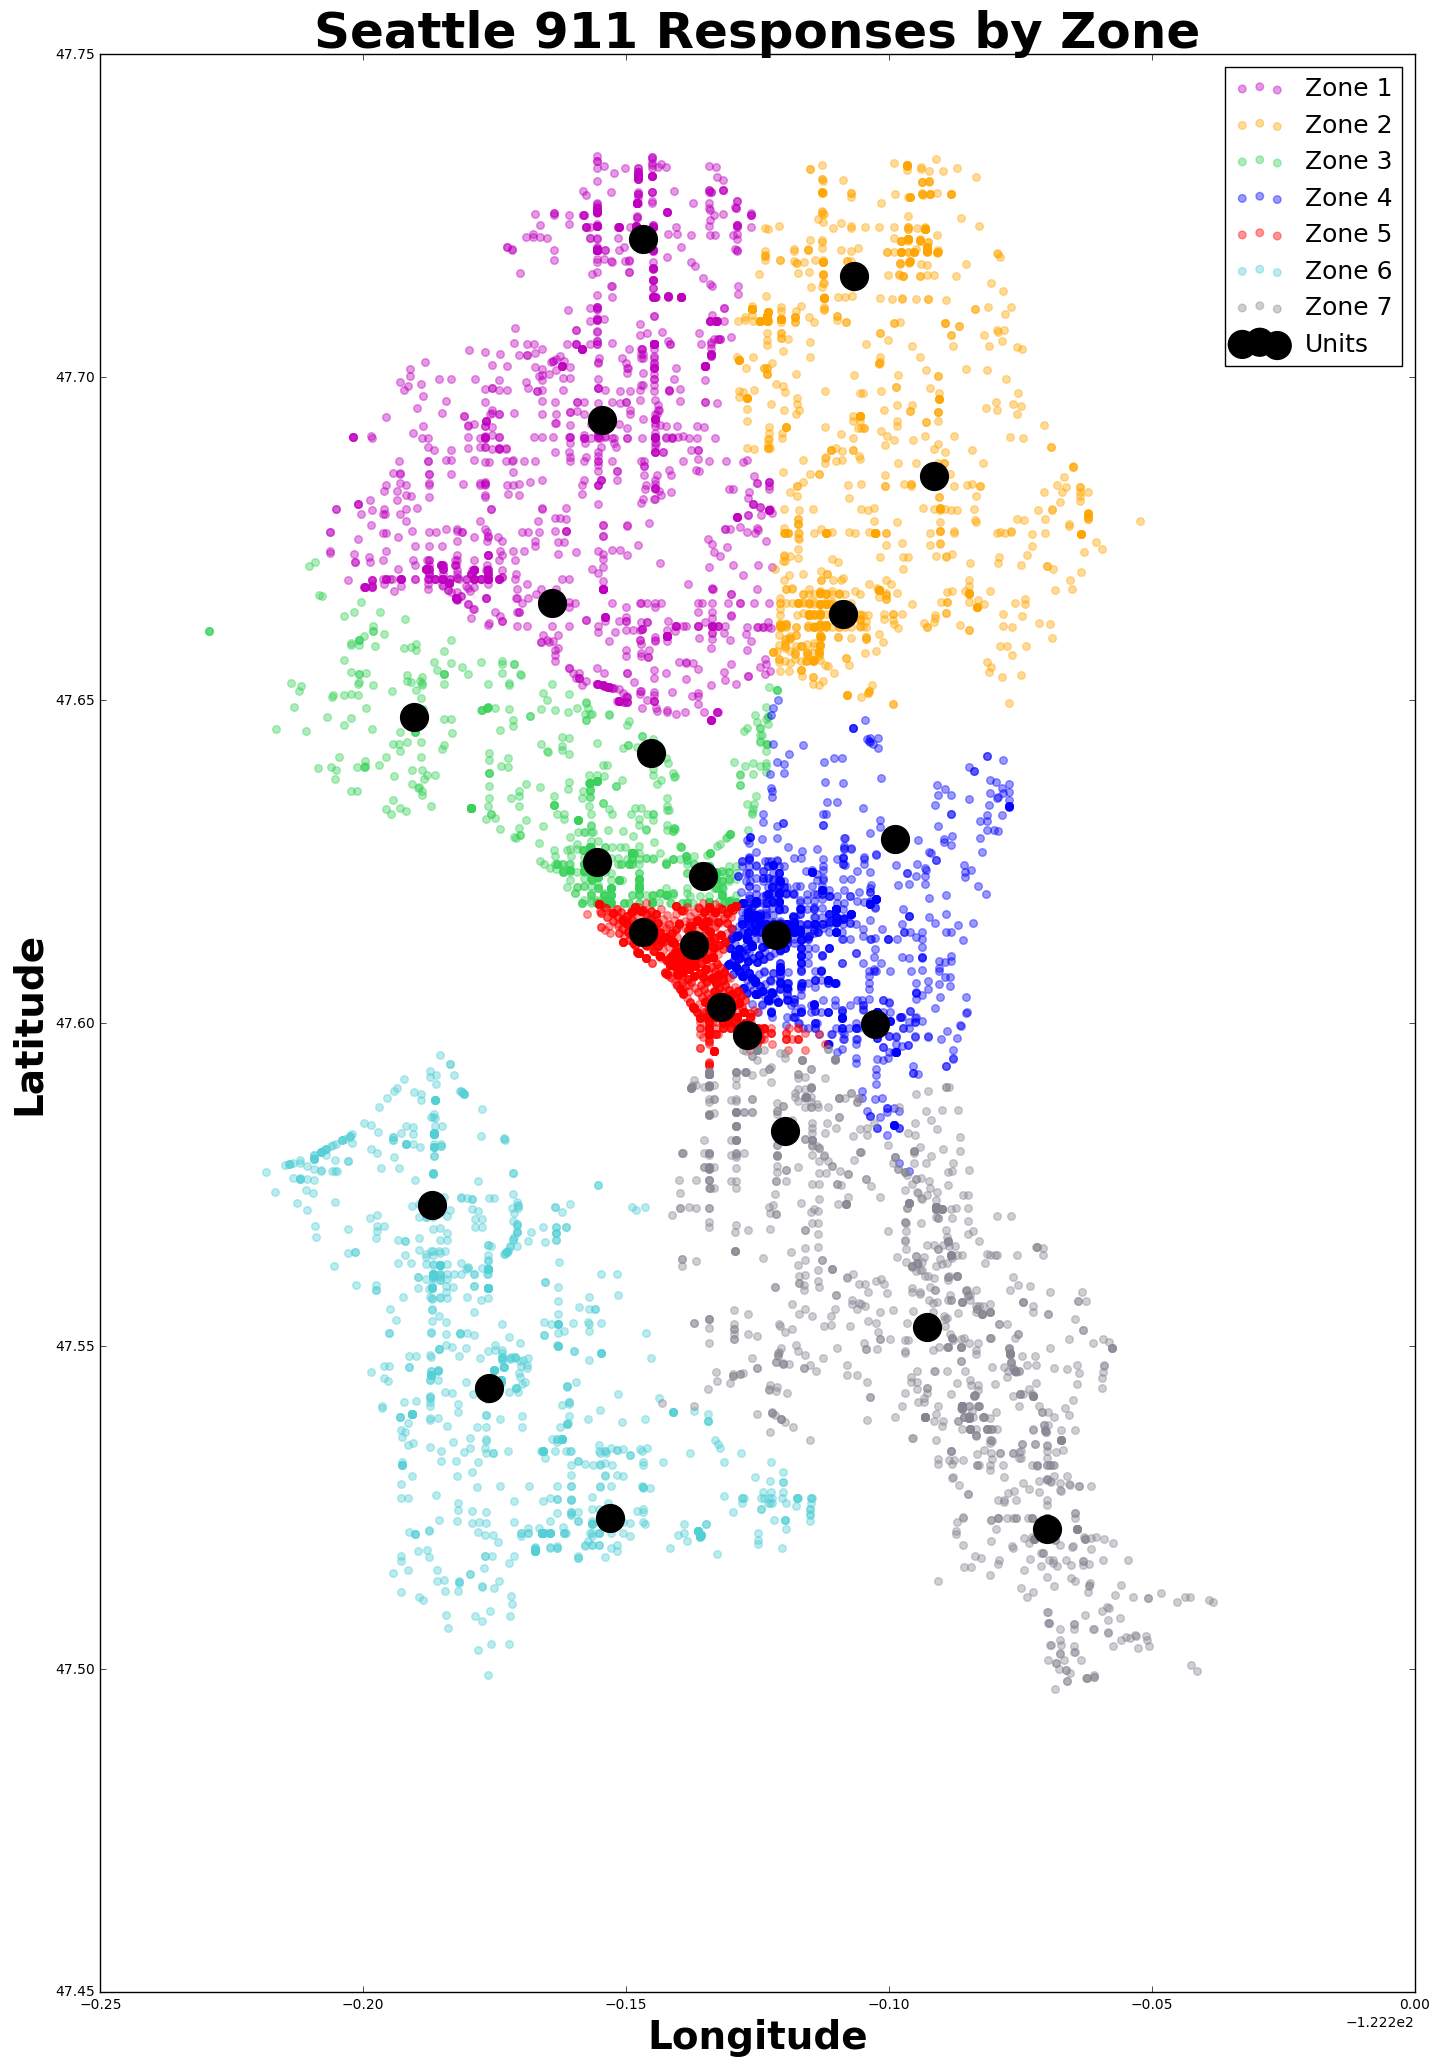

In [10]:
# Create and save a scatter plot (map) of 911 calls by zone
plt.figure(figsize=(16.96,25))
plt.scatter(x=df1.Longitude, y=df1.Latitude, color='m', s=30, alpha=0.4)
plt.scatter(x=df2.Longitude, y=df2.Latitude, color='orange', s=30, alpha=0.4)
plt.scatter(x=df3.Longitude, y=df3.Latitude, color='#38d159', s=30, alpha=0.4)
plt.scatter(x=df4.Longitude, y=df4.Latitude, color='b', s=30, alpha=0.4)
plt.scatter(x=df5.Longitude, y=df5.Latitude, color='r', s=30, alpha=0.4)
plt.scatter(x=df6.Longitude, y=df6.Latitude, color='#53cfd6', s=30, alpha=0.4)
plt.scatter(x=df7.Longitude, y=df7.Latitude, color='#868591', s=30, alpha=0.4)
plt.scatter(centroid_df.Longitude, centroid_df.Latitude, s=400, color='k')
plt.xlabel('Longitude', fontsize=28, fontweight='bold')
plt.ylabel('Latitude', fontsize=28, fontweight='bold')
plt.title('Seattle 911 Responses by Zone', fontsize=36, fontweight='bold')
plt.legend(['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Units'], fontsize=18)
plt.savefig('../images/seattle_911_pred.png')